# Health Insurance Cross Sell Prediction

In this notebook, we will apply different Machine Learning methods to predict wether customers who hold a health insurance are also interested in taking a car insurance.

For this purpose, we will use a dataset which is available on kaggle (https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction). It holds information about the customers in a csv file, as well as information about wether a customer is interested in a car insurance. The original dataset is already split into training and test data, however we will only use the training dataset here and treat it as if it was the complete dataset, since we do not have access to the target labels in the original test dataset.


## Libraries

Before doing anything, we need to import the libraries needed for the task. We will use numpy and pandas, two standard libraries for working with data structures, as well as matplotlib and seaborn for visualisation and sklearn for providing Machine Learning methods:

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn 

from pandas.api.types import CategoricalDtype, is_numeric_dtype
from sklearn.model_selection import train_test_split

## Loading the data

An important step in any Machine Learning task is cleaning the data and bringing it into the correct form. In this case, the data is conveniently stored in a single csv file which we can open as a pandas dataframe. The resulting dataframe contains 381109 rows and 12 columns:

In [33]:
data_path = '/home/jonas/Desktop/health_insurance_cross_sell_prediction/data/data.csv'
data = pd.read_csv(data_path)
data.shape

(381109, 12)

Let's have a look at the first rows of the dataframe and the data type of each column:

In [34]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [35]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

## Data Cleaning

In the data description on the kaggle website the meaning of the individual columns is explained. Our task is to predict the variable 'Response', which is a binary variable indicating if a customer is interested in taking a car insurance or not. Some of the variables are not encoded correctly yet. We will now adjust the encoding of those variables so that they are better suitable for Machine Learning purposes:

Starting with the 'Gender' column, it is currently encoded as a string, however for the purposes of Machine Learning it would be more practicable as a numeric variable. Thus we change the type and values of the column accordingly:

In [22]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

The 'Region Code' column holds an identifier for the customer's location. Treating it as a numerical variable would be unreasonable since it is not a quantitative measure. This variable is better represented as a string:

In [36]:
data['Region_Code'] = data['Region_Code'].astype(str)

The age of a customer's vehicle would be useful as a numerical value. However in this case, we only have the information wether the car is less than one year, between one and two years, or more than two years old. 

In [37]:
np.unique(data['Vehicle_Age'])

array(['1-2 Year', '< 1 Year', '> 2 Years'], dtype=object)

We cannot reasonably transform these into numerical values, however leaving them as strings would mean losing information. Instead, we can use the categorical datatype to preserve the ordering between values:

In [25]:
cat_type = CategoricalDtype(categories=['< 1 Year', '1-2 Year', '> 2 Years'], ordered=True)
data['Vehicle_Age'] = data['Vehicle_Age'].astype(cat_type)

Same as for the  gender information, the 'Vehicle Damage' column indicating if a car was damaged in the past is better suited in numerical form:

In [38]:
data['Vehicle_Damage'] = data['Vehicle_Damage'].map({'No': 0, 'Yes': 1})

Same as for the regional code, the 'Policy_Sales_Channel' column is an identifier rather than a quantitative measure, ans hould therefore be changed to a string:

In [39]:
data['Policy_Sales_Channel'] = data['Policy_Sales_Channel'].astype(str)

Having performed the necessary data cleaning steps, our dataset now looks like this:

In [28]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [29]:
data.dtypes

id                         int64
Gender                     int64
Age                        int64
Driving_License            int64
Region_Code               object
Previously_Insured         int64
Vehicle_Age             category
Vehicle_Damage             int64
Annual_Premium           float64
Policy_Sales_Channel      object
Vintage                    int64
Response                   int64
dtype: object

## Splitting into training and test set

Next, we will split the data set in a training set and a test set, so that we can evaluate our results later. Note that in the original kaggle dataset there is already a test set, however we don't have access to the labels there and therefore we have to create our own test set. We see that our training set holds 304887 rows, and our test set holds 76222 rows.

In [40]:
d_train, d_test = sklearn.model_selection.train_test_split(data, test_size=0.2)

print(d_train.shape)
print(d_test.shape)

(304887, 12)
(76222, 12)


## Exploratory Analysis

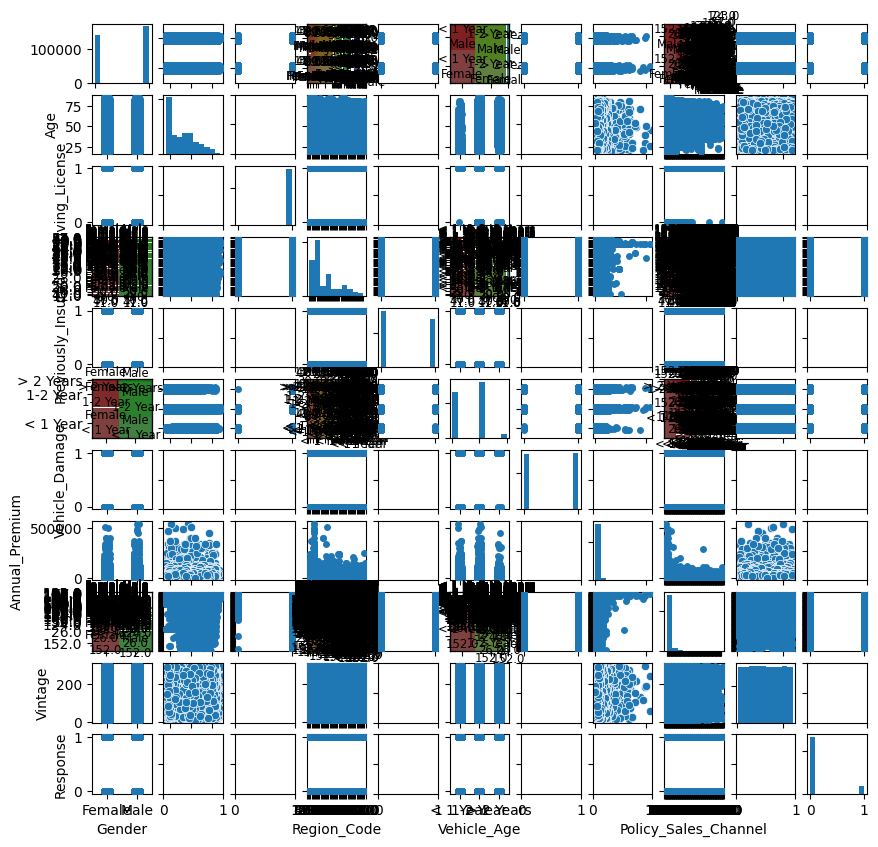

In [140]:
df = d_train.loc[:,data.columns != 'id']

grid_size = len(df.columns)

fig, axs = plt.subplots(grid_size,grid_size, figsize=(10,10))

for i,yname in enumerate(df.columns):
    for j,xname in enumerate(df.columns):
        if i==j:
            axs[i,j].hist(x=df[xname])
        elif is_numeric_dtype(df[yname]) and is_numeric_dtype(df[xname]):
            if len(np.unique(df[yname]))>2 and len(np.unique(df[xname]))>2:
                sns.scatterplot(ax=axs[i,j],x=df[xname],y=df[yname])
        elif not is_numeric_dtype(df[yname]) and not is_numeric_dtype(df[xname]):
            fig, rect = mosaic(ax=axs[i,j], data=df,index=[xname,yname])
        else :
            sns.stripplot(ax=axs[i,j],data=df,x=xname,y=yname)
        # set axis labels
        if j != 0:
            axs[i,j].set_ylabel('')
            axs[i,j].set_yticklabels([])
        if i != grid_size-1:
            axs[i,j].set_xlabel('')
            axs[i,j].set_xticklabels([])
        

In [138]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='Age', ylabel='id'>,
        <Axes: xlabel='Driving_License', ylabel='id'>,
        <Axes: xlabel='Previously_Insured', ylabel='id'>,
        <Axes: xlabel='Vehicle_Damage', ylabel='id'>,
        <Axes: xlabel='Annual_Premium', ylabel='id'>,
        <Axes: xlabel='Vintage', ylabel='id'>,
        <Axes: xlabel='Response', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='Age'>,
        <Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Driving_License', ylabel='Age'>,
        <Axes: xlabel='Previously_Insured', ylabel='Age'>,
        <Axes: xlabel='Vehicle_Damage', ylabel='Age'>,
        <Axes: xlabel='Annual_Premium', ylabel='Age'>,
        <Axes: xlabel='Vintage', ylabel='Age'>,
        <Axes: xlabel='Response', ylabel='Age'>],
       [<Axes: xlabel='id', ylabel='Driving_License'>,
        <Axes: xlabel='Age', ylabel='Driving_License'>,
        <Axes: xlabel='Driving_License', ylabel='Driving_License'>,
        <

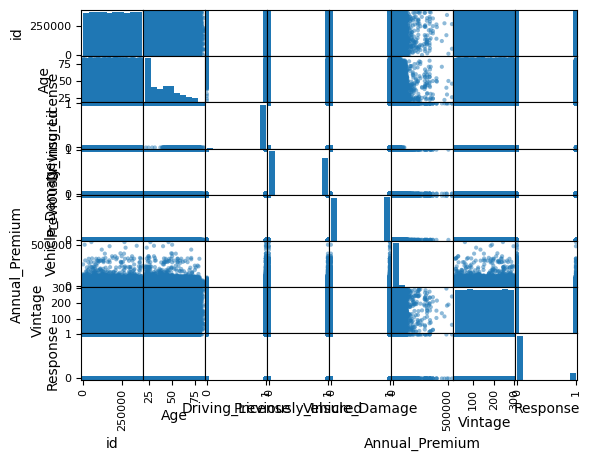

In [42]:
pd.plotting.scatter_matrix(d_train)

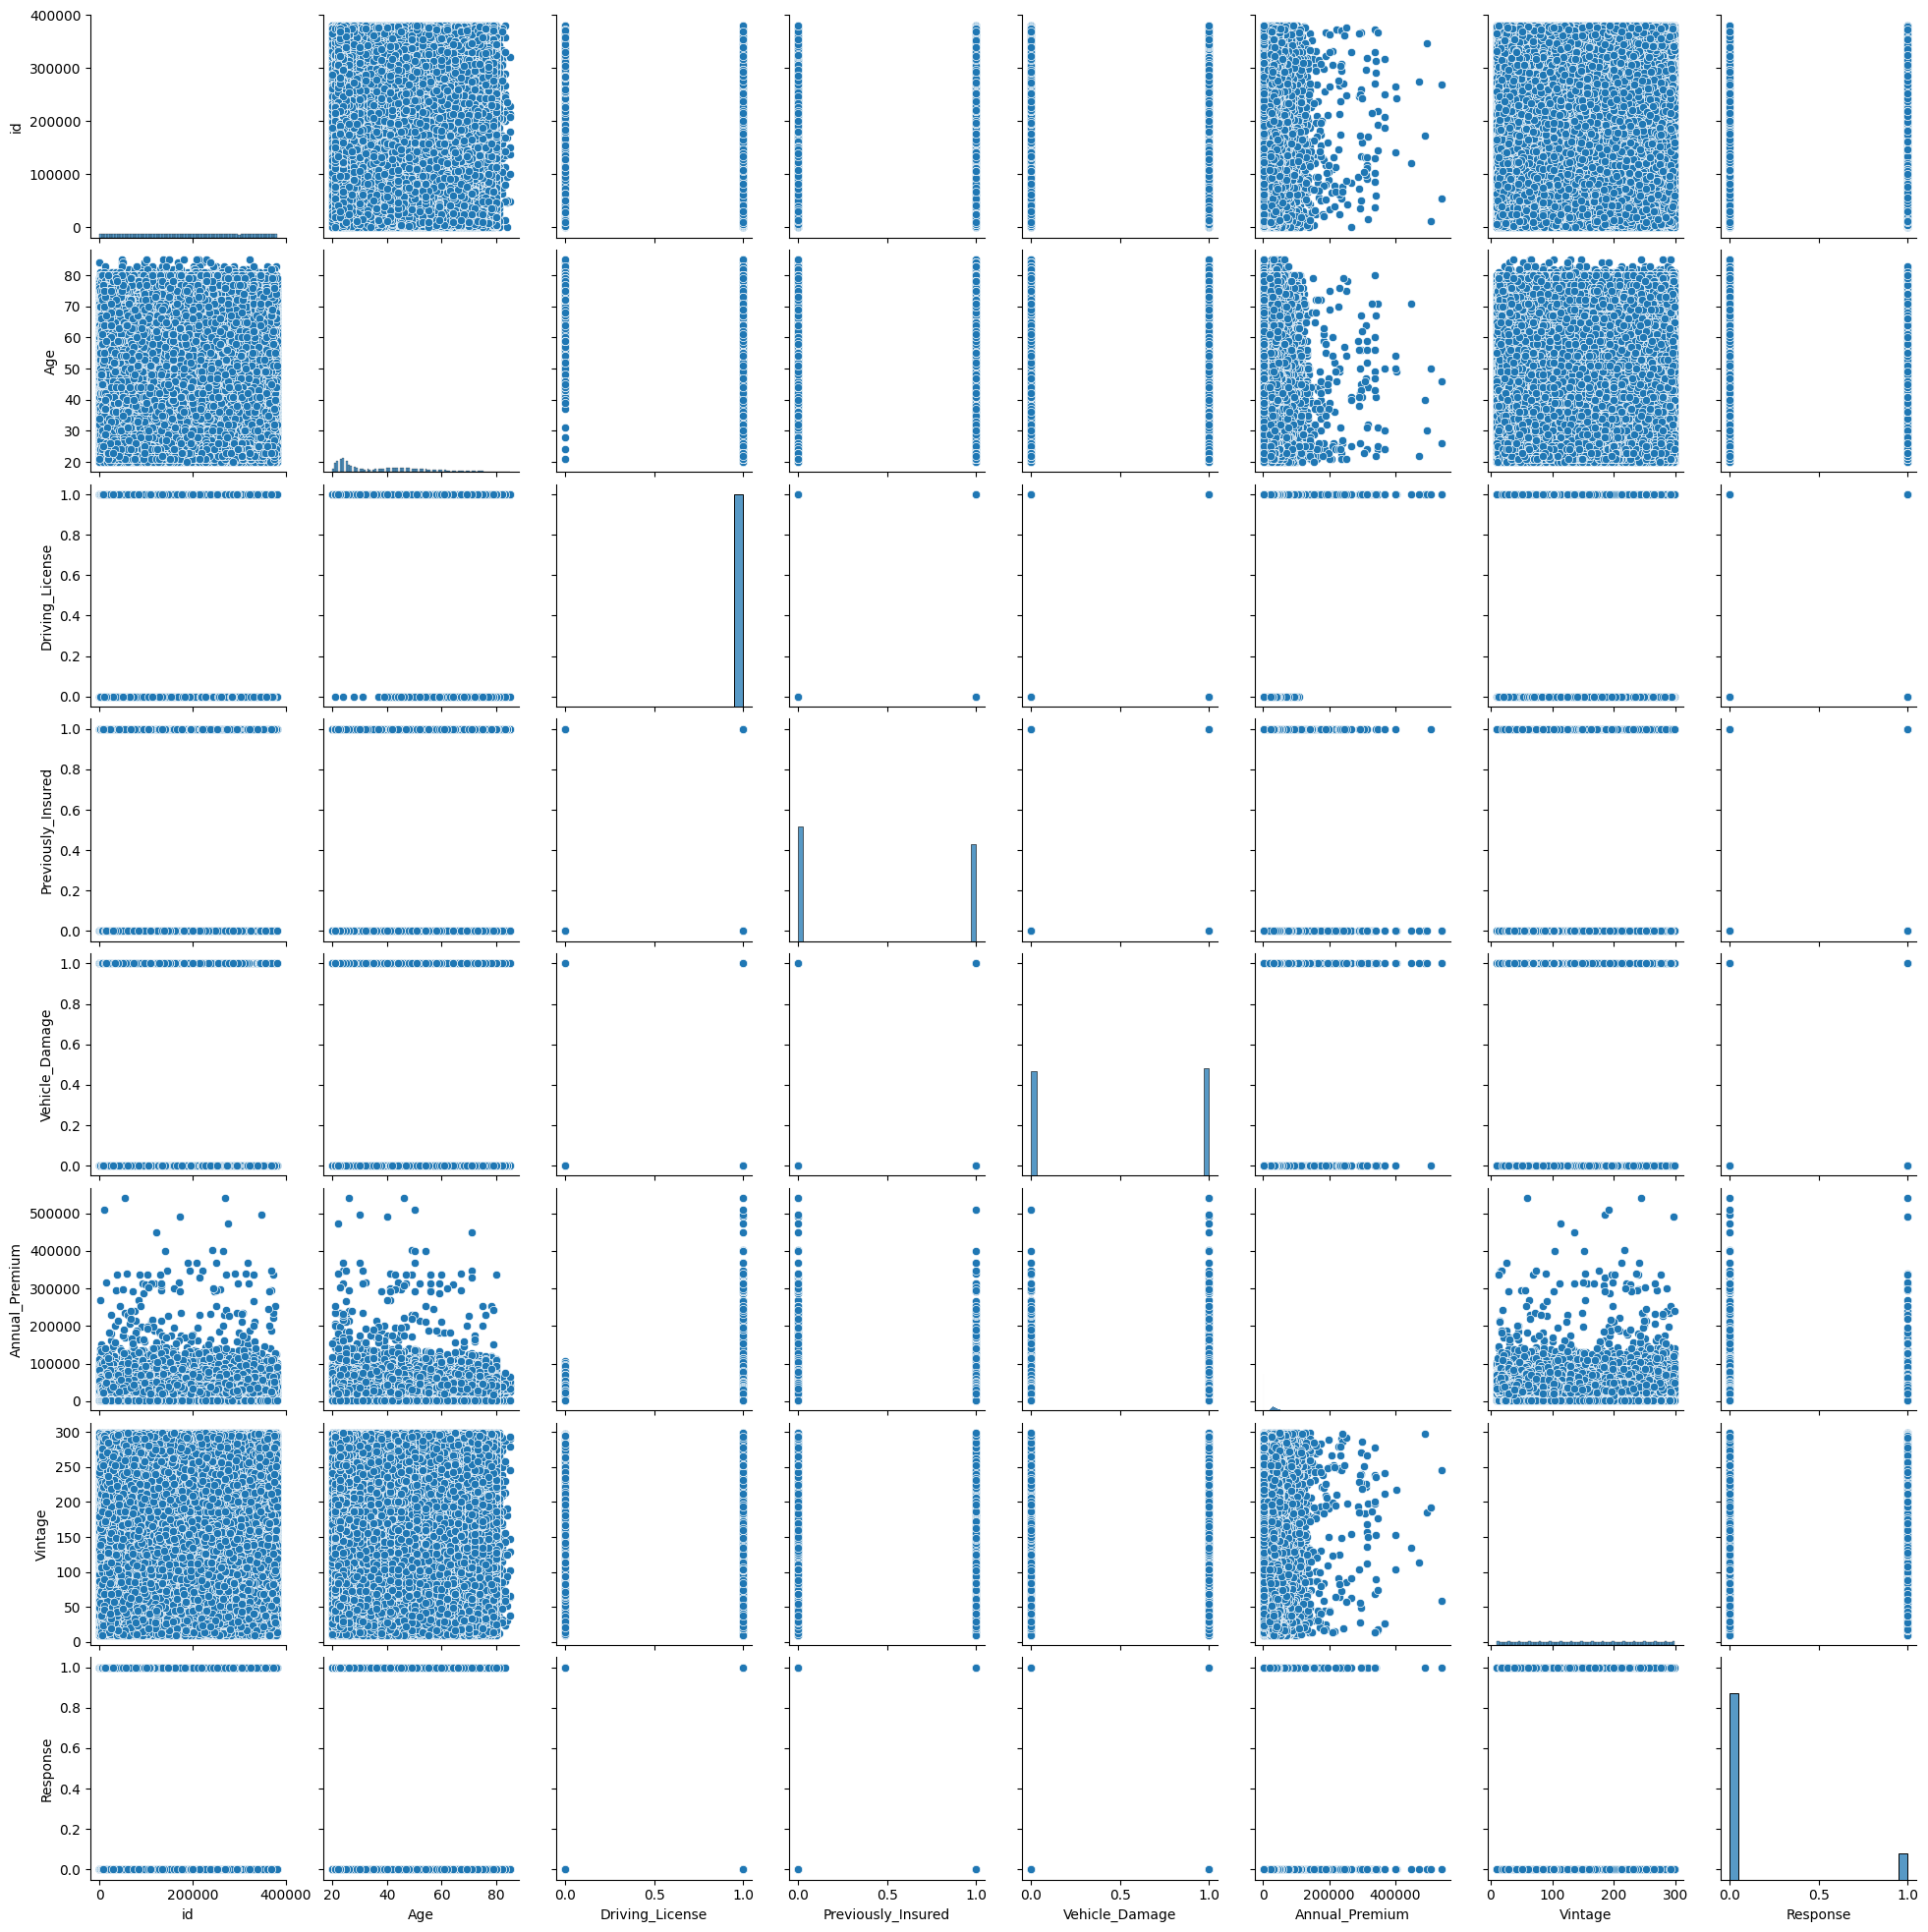

In [46]:
sns.pairplot(d_train)

## Apply ML methods